In [ ]:
pip install numpy scipy matplotlib pandas yfinance


In [ ]:
import yfinance as yf
import pandas as pd

# Define stock tickers
tickers = ['AAPL', 'MSFT', 'TSLA']

# Download historical data (5 years of data)
stock_data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Adj Close']

# Display the first few rows
print(stock_data.head())


[*********************100%***********************]  3 of 3 completed

Ticker           AAPL       MSFT       TSLA
Date                                       
2018-01-02  40.524345  79.633530  21.368668
2018-01-03  40.517292  80.004150  21.150000
2018-01-04  40.705494  80.708260  20.974667
2018-01-05  41.168926  81.708893  21.105333
2018-01-08  41.016014  81.792274  22.427334


In [ ]:
# Calculate daily returns
daily_returns = stock_data.pct_change().dropna()

# Display the first few rows
print(daily_returns.head())


Ticker          AAPL      MSFT      TSLA
Date                                    
2018-01-03 -0.000174  0.004654 -0.010233
2018-01-04  0.004645  0.008801 -0.008290
2018-01-05  0.011385  0.012398  0.006230
2018-01-08 -0.003714  0.001020  0.062638
2018-01-09 -0.000115 -0.000679 -0.008085


In [ ]:
# Calculate expected returns (mean of daily returns * 252 for annual returns)
expected_returns = daily_returns.mean() * 252

# Calculate the covariance matrix (daily covariance * 252 for annual covariance)
cov_matrix = daily_returns.cov() * 252

print("Expected Annual Returns:\n", expected_returns)
print("\nCovariance Matrix:\n", cov_matrix)


Expected Annual Returns:
 Ticker
AAPL    0.287461
MSFT    0.265836
TSLA    0.565226
dtype: float64

Covariance Matrix:
 Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    0.112125  0.080322  0.102304
MSFT    0.080322  0.096306  0.093841
TSLA    0.102304  0.093841  0.429562


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to minimize (negative Sharpe Ratio)
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Number of assets in portfolio
num_assets = len(tickers)

# Randomly initialize weights
initial_weights = np.random.random(num_assets)
initial_weights /= np.sum(initial_weights)  # Normalize the weights

# Constraints (weights sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for each weight (between 0 and 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimize portfolio weights
result = minimize(minimize_volatility, initial_weights, args=(expected_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Display optimized weights and performance
optimal_weights = result.x
portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, expected_returns, cov_matrix)

print("Optimal Weights: ", optimal_weights)
print("Portfolio Return: ", portfolio_return)
print("Portfolio Volatility: ", portfolio_volatility)


Optimal Weights:  [0.33334193 0.66665807 0.        ]
Portfolio Return:  0.2730444683273586
Portfolio Volatility:  0.30159557980528495


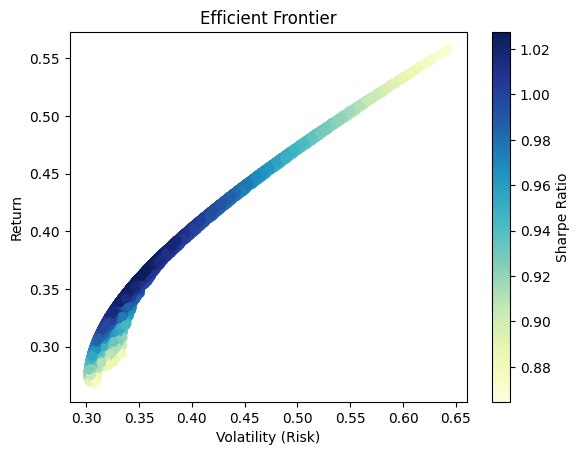

In [ ]:
import matplotlib.pyplot as plt

# Function to generate random portfolios
def generate_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_return
        results[1,i] = portfolio_volatility
        results[2,i] = portfolio_return / portfolio_volatility  # Sharpe ratio
    return results

# Generate portfolios
num_portfolios = 10000
results = generate_portfolios(num_portfolios, expected_returns, cov_matrix)

# Plot Efficient Frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
